In [414]:
library(tidyverse)
library(showtext)

In [415]:
file.exists("C:/Windows/Fonts/Helvetica")

[1] FALSE

In [445]:
# Plot Settings

# Font
showtext_auto()
font_add("Helvetica", regular = "./Fonts/Helvetica/Helvetica.ttf")

# Color Palette
group_colors <- c(
  "G1" = "#33a02c",
  "G2" = "#b2df8a",
  "G3" = "#0162a7",
  "G4" = "#a6cee3",
  "G5" = "#e31a1c",
  "G6" = "#fb9a99"
)

plot_settings = 
    theme(
        text = element_text(family = "Helvetica"),
        title = element_text(size = 20),
        axis.title = element_text(size = 28),
        axis.text = element_text(size = 20),
        strip.text = element_text(size = 20),
        legend.title = element_text( size = 28),
        legend.text = element_text(size = 20),
        legend.position = "right",
        panel.background = element_blank(),
        panel.grid.major = element_line(color = "lightgrey"),
        # panel.grid.minor = element_line(color = "lightgrey")
    )


In [417]:
data <- read.csv("./data/raw/bitelamina/bitelamina.csv") %>% 
    mutate(
        Gruppe = Gruppe %>% as.factor(),
        Wiederholung = Wiederholung %>% as.factor(),
        Streifen = Streifen %>% as.factor(),
        Wert = Wert*50 %>% as.numeric()
    )

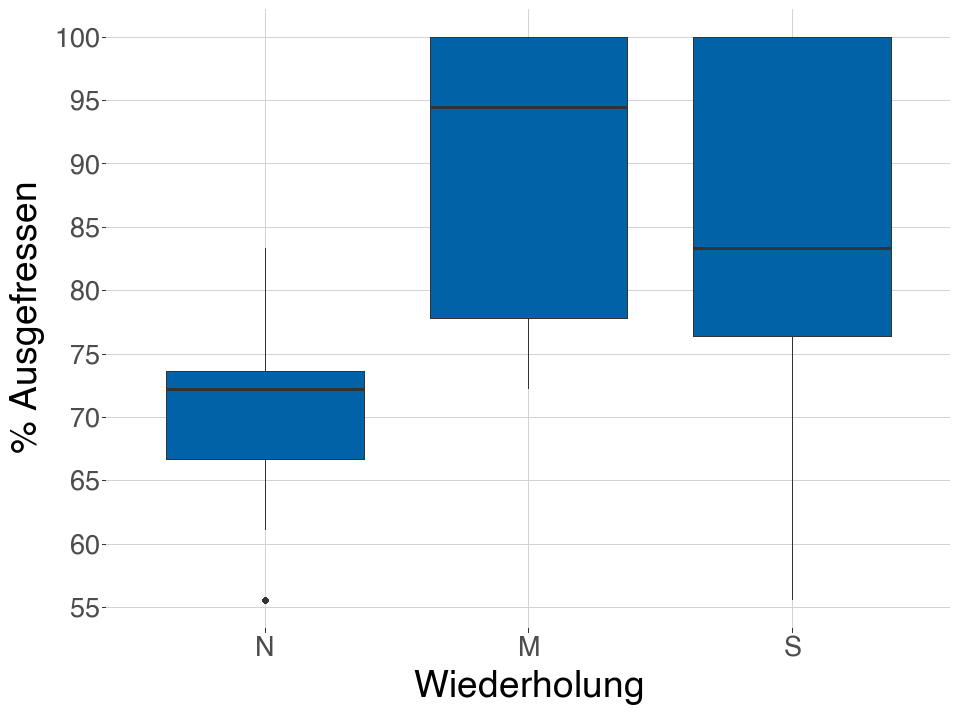

In [451]:
# Boxplot Gruppe 3

ratio <- list(width = 8, height = 6)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
filter(Gruppe == "G3") %>%
mutate(Wiederholung = recode(Wiederholung, "W1" = "N", "W2" = "M", "W3" = "S")) %>%
group_by(Wiederholung, Tiefe) %>% 
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>%
    ggplot(aes(x = Wiederholung, y = mean)) +
    geom_boxplot(fill="#0162a7") +
    plot_settings +
        labs(
            x = "Wiederholung",
            y = "% Ausgefressen"
            )+
        scale_y_continuous(breaks = seq(55, 100, by = 5))
    

ggsave("./plots/G3_Boxplot.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

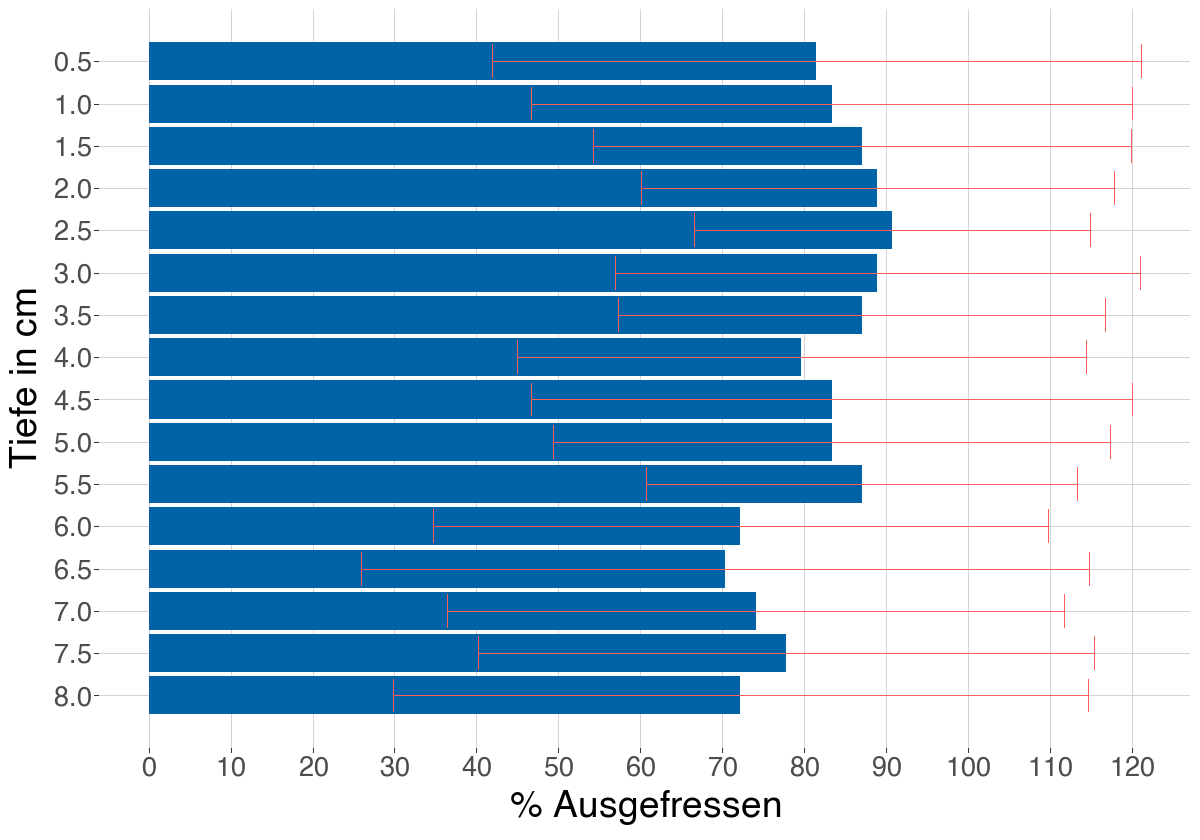

In [452]:
# Barplot Gruppe 3

# set Ratio
ratio <- list(width = 10, height = 7)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
filter(Gruppe == "G3") %>%
group_by(Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert)) %>%
    ggplot()+
    geom_bar( aes(x=Tiefe, y=mean), stat="identity", fill="#0162a7") +
    geom_errorbar(
        aes(x=Tiefe, ymin=mean-sd, ymax=mean+sd), 
        width=0.4, colour="#ff5c5c", size=0.5
    ) +
    plot_settings +
        coord_flip() +
        labs(
        x = "Tiefe in cm",
        y = "% Ausgefressen"
        )+
        scale_y_continuous(breaks = seq(0, 125, by = 10)) +
        scale_x_reverse(breaks = seq(8, 0.5, by = -0.5))

ggsave("./plots/G3_Barplot.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

In [420]:
data %>% 
group_by(Gruppe, Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>% head()

Gruppe,Tiefe,mean,sd
<fct>,<dbl>,<dbl>,<dbl>
G1,0.5,98.14815,9.622504
G1,1.0,96.29630,19.245009
G1,1.5,94.44444,21.182964
G1,2.0,90.74074,27.863117
G1,2.5,88.88889,25.318484
G1,3.0,90.74074,27.863117


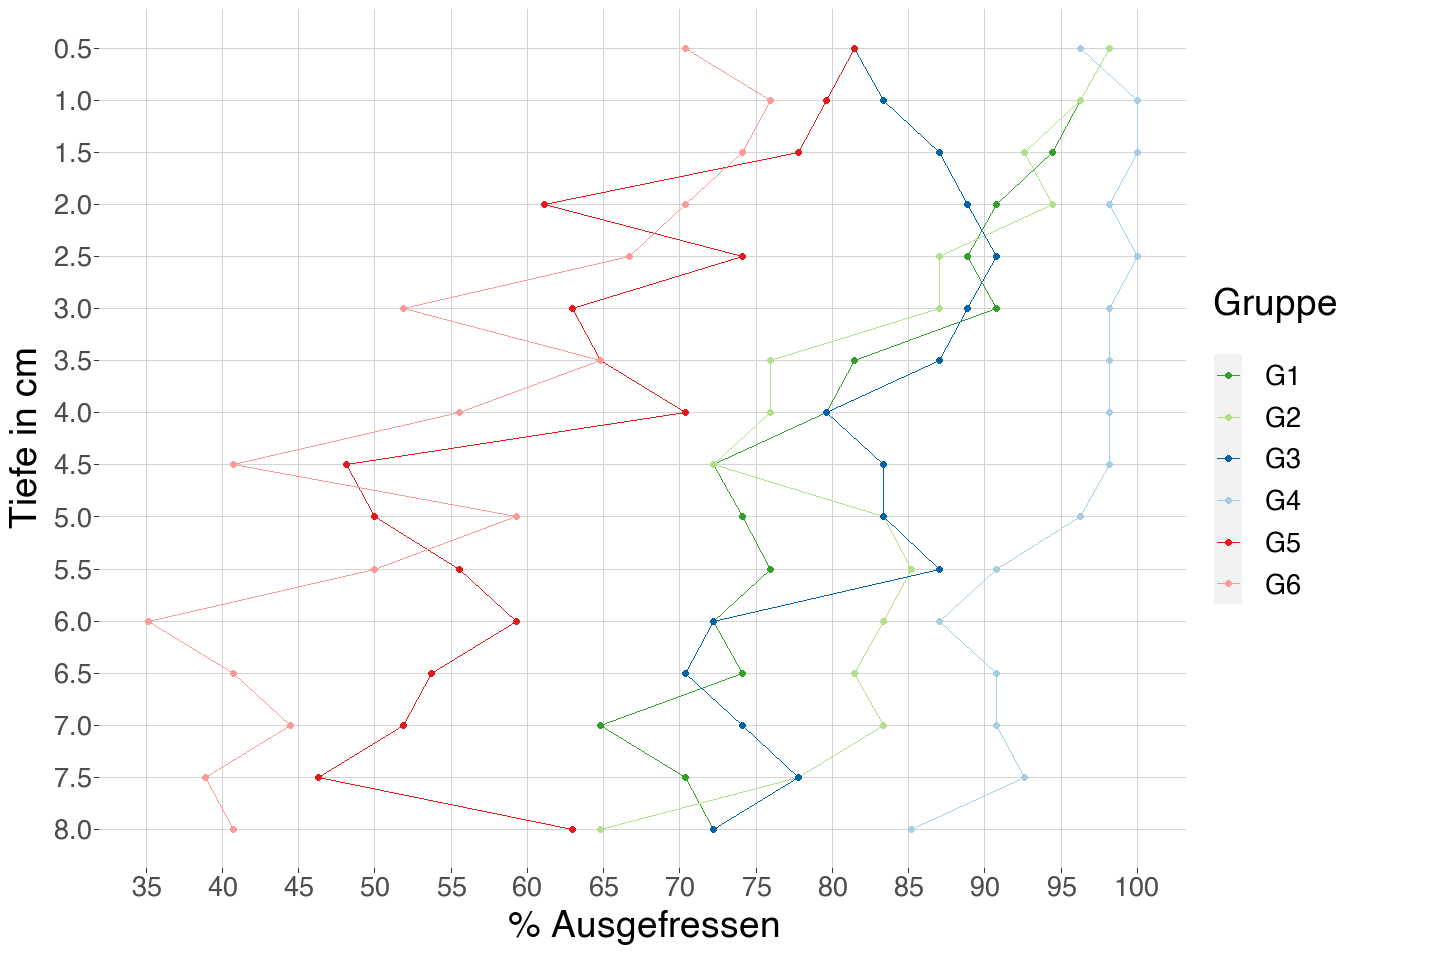

In [453]:
# Lineplot All

ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
group_by(Gruppe, Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>%
    ggplot(aes(x = Tiefe, y = mean))+
    geom_line(aes(color = Gruppe)) +
    geom_point(aes(color = Gruppe)) +
    plot_settings +
        scale_color_manual(values = group_colors) +
        scale_x_reverse(breaks = seq(8, 0.5, by = -0.5)) +
        scale_y_continuous(breaks = seq(30, 100, by = 5)) +
        coord_flip() +
        labs(
            x = "Tiefe in cm",
            y = "% Ausgefressen"
            )

ggsave("./plots/All_Line.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

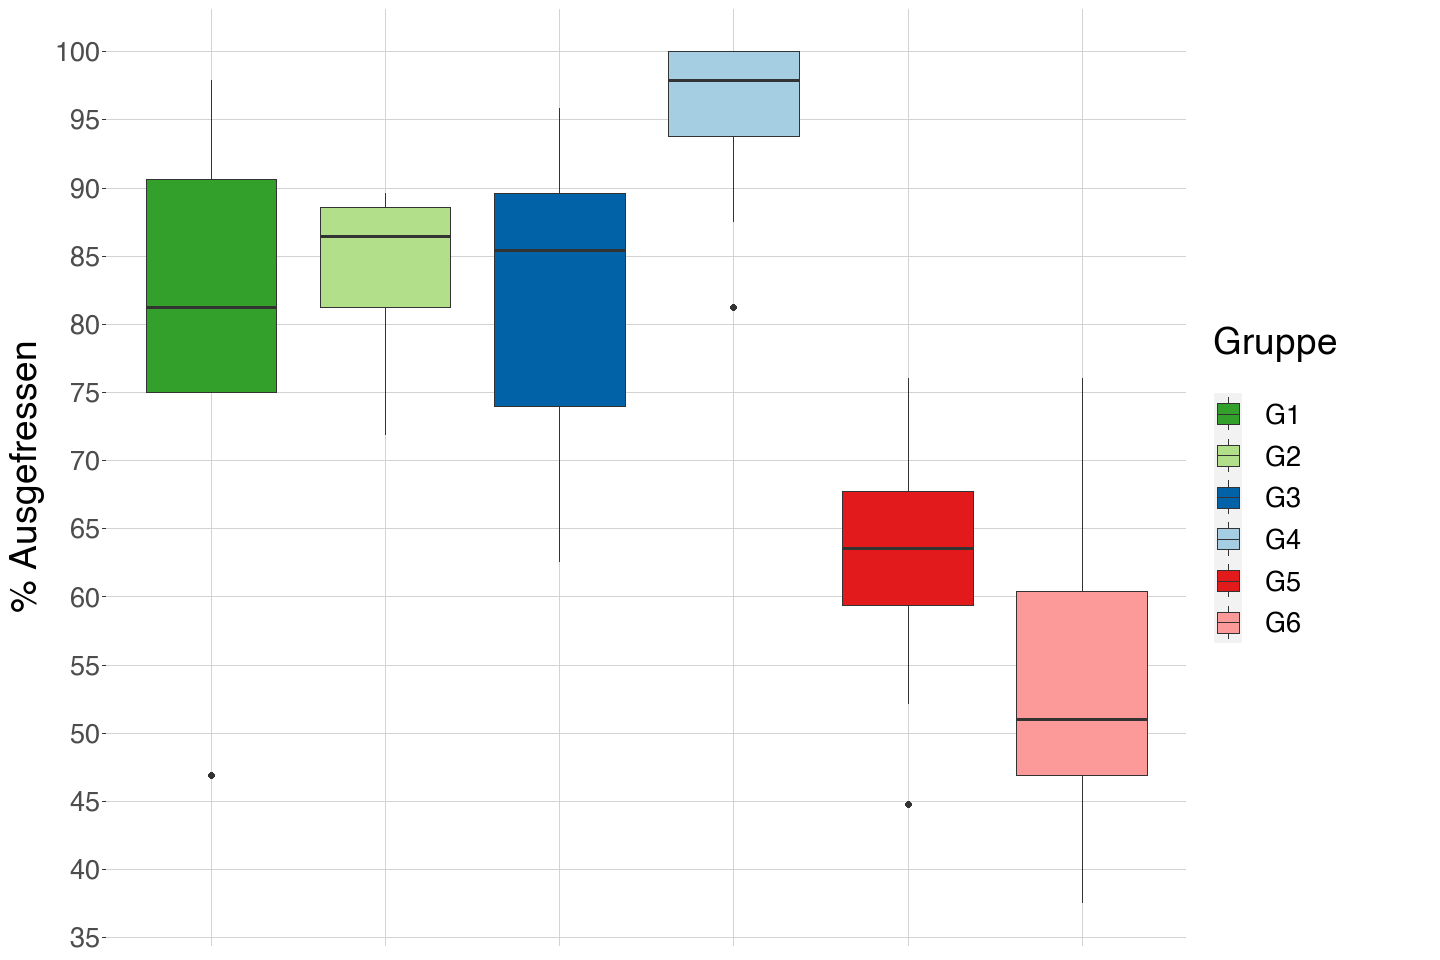

In [454]:
# Boxplot All

ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
group_by(Gruppe, Streifen) %>%
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>%
    ggplot(aes(x=Gruppe, y=mean)) +
    geom_boxplot(aes(fill = Gruppe)) +
    plot_settings +
        scale_y_continuous(breaks = seq(35, 100, by = 5)) +
        scale_fill_manual(values = group_colors) +
        labs(y = "% Ausgefressen") +
        theme(
            axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank()
        )

ggsave("./plots/All_Box.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)